In [231]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd


In [232]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [233]:
df_airline.isnull().sum()

,0
Month,0
Thousands of Passengers,1


In [234]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [235]:
df_airline.dropna(axis=0,inplace=True)

In [236]:
df_airline.isnull().sum()

,0
Month,0
Thousands of Passengers,0


In [237]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [238]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [239]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [240]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


<Axes: xlabel='Month'>

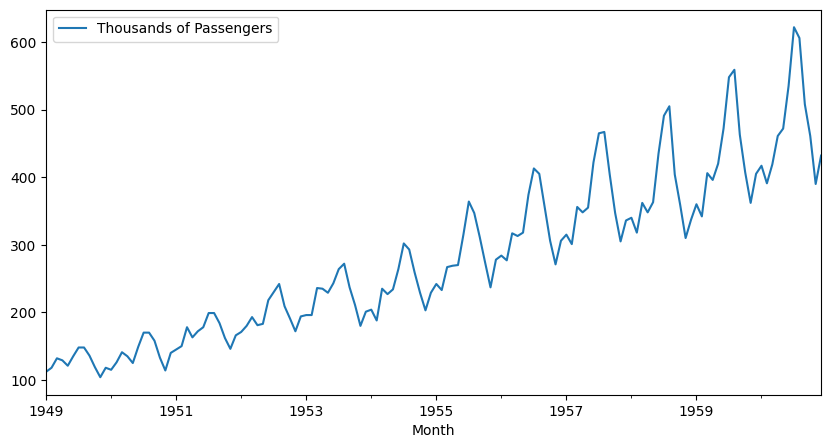

In [241]:
df_airline.plot(x='Month',y='Thousands of Passengers',figsize=(10,5))

In [242]:
from statsmodels.tsa.stattools import adfuller

In [243]:
def adf_test(timeseries):
  result=adfuller(timeseries)
  print('ADF Statistic: {}'.format(result[0]))
  print('p-value: {}'.format(result[1]))
  if result[1] <=0.05:
    print('Reject Null Hypothesis.Data is stationary')
  else:
    print('Fail to Reject Null Hypothesis.Data is not stationary')

In [244]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Fail to Reject Null Hypothesis.Data is not stationary


### Use Techniques Differencing


In [245]:
df_airline['Passengers first difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [246]:
df_airline.head()

,Month,Thousands of Passengers,Passengers first difference
0,1949-01-01,112.0,NaN
1,1949-02-01,118.0,6.0
2,1949-03-01,132.0,14.0
3,1949-04-01,129.0,-3.0
4,1949-05-01,121.0,-8.0


In [247]:
adf_test(df_airline['Passengers first difference'].dropna())

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
Fail to Reject Null Hypothesis.Data is not stationary


In [248]:
df_airline['Passengers second difference']=df_airline['Passengers first difference']-df_airline['Passengers first difference'].shift(1)
adf_test(df_airline['Passengers second difference'].dropna())

ADF Statistic: -16.384231542468513
p-value: 2.7328918500142026e-29
Reject Null Hypothesis.Data is stationary


In [249]:
#12 months

df_airline['Passengers 12 difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)
adf_test(df_airline['Passengers 12 difference'].dropna())

ADF Statistic: -3.383020726492481
p-value: 0.011551493085514952
Reject Null Hypothesis.Data is stationary


In [250]:
df_airline.head()

,Month,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference
0,1949-01-01,112.0,NaN,NaN,NaN
1,1949-02-01,118.0,6.0,NaN,NaN
2,1949-03-01,132.0,14.0,8.0,NaN
3,1949-04-01,129.0,-3.0,-17.0,NaN
4,1949-05-01,121.0,-8.0,-5.0,NaN


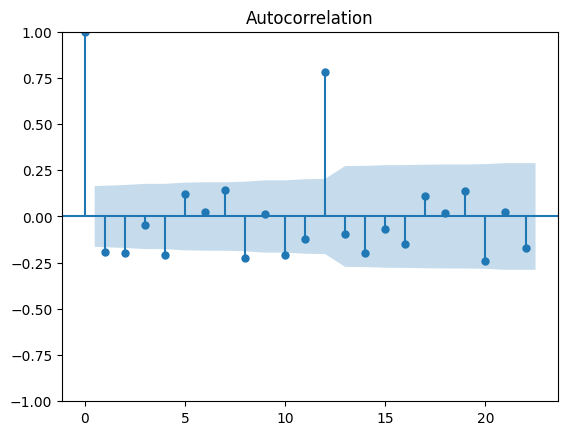

In [251]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf=plot_acf(df_airline['Passengers second difference'].dropna())

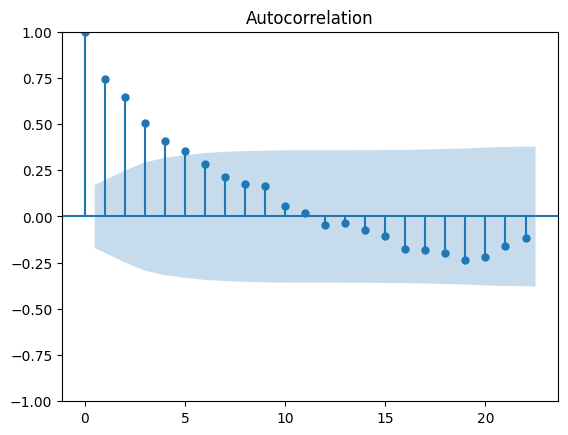

In [252]:
acf12=plot_acf(df_airline['Passengers 12 difference'].dropna())

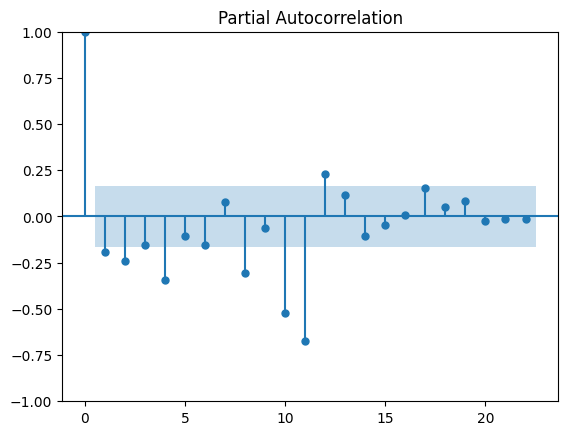

In [253]:
pacf=plot_pacf(df_airline['Passengers second difference'].dropna())

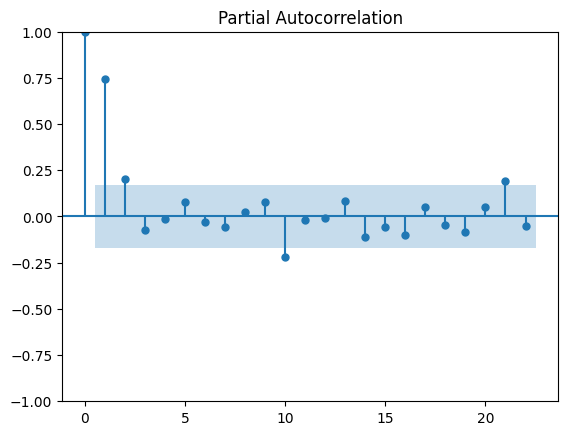

In [254]:
pacf12=plot_pacf(df_airline['Passengers 12 difference'].dropna())

In [255]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [256]:
df_airline.set_index('Month', inplace=True)
train_dataset=df_airline[:train_dataset_end]
test_dataset=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [257]:
##prediction
pred_start_date=test_start_date.index[0]
pred_end_date=test_start_date.index[-1]

In [258]:
test_dataset

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


### create a ARIMA model


In [259]:
from statsmodels.tsa.arima.model import ARIMA

In [260]:
train_dataset

,Thousands of Passengers,Passengers first difference,Passengers second difference,Passengers 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [261]:
model_ARIMA=ARIMA(train_dataset['Thousands of Passengers'],order=(11,2,12))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [262]:
model_ARIMA_fit=model_ARIMA.fit()
model_ARIMA_fit.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(11, 2, 12)   Log Likelihood                -306.631
Date:                     Sat, 20 Dec 2025   AIC                            661.262
Time:                             14:42:26   BIC                            719.023
Sample:                         01-01-1949   HQIC                           684.452
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8201      0.363     -2.258      0.024      -1.532      -0.108
ar.L2         -0.9455      0.149     -6.363      0.000      -1.237      -0.654
ar.L3         -0.8330      0.337     -2.470      0.014      -1.494      -0.172
ar.L4         -0.8688      0.119     -7.314      0.000      -1.102      -0.636
ar.L5         -0.8858      0.347     -2.555      0.011      -1.565      -0.206
ar.L6         -0.7726      0.174     -4.443      0.000      -1.113      -0.432
ar.L7         -0.9001      0.306     -2.939      0.003      -1.500      -0.300
ar.L8         -0.8487      0.145     -5.843      0.000      -1.133      -0.564
ar.L9         -0.9222      0.276     -3.338      0.001      -1.464      -0.381
ar.L10        -0.8694      0.124     -7.002      0.000      -1.113      -0.626
ar.L11        -0.7848      0.262     -3.001      0.003      -1.297      -0.272
ma.L1         -0.3643      0.721     -0.505      0.614      -1.778       1.049
ma.L2          0.0519      0.930      0.056      0.956      -1.771       1.875
ma.L3         -0.3981      0.888     -0.448      0.654      -2.138       1.342
ma.L4          0.1163      1.146      0.101      0.919      -2.130       2.362
ma.L5          0.0248      1.197      0.021      0.983      -2.322       2.371
ma.L6         -0.2047      1.151     -0.178      0.859      -2.460       2.051
ma.L7          0.2634      0.935      0.282      0.778      -1.570       2.097
ma.L8         -0.4528      0.752     -0.602      0.547      -1.926       1.021
ma.L9          0.4403      0.550      0.800      0.424      -0.638       1.519
ma.L10        -0.4032      0.374     -1.079      0.281      -1.136       0.329
ma.L11         0.0428      0.303      0.141      0.888      -0.551       0.637
ma.L12        -0.0516      0.263     -0.196      0.844      -0.567       0.463
sigma2        76.9849     27.355      2.814      0.005      23.370     130.600
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 3.28
Prob(Q):                              0.78   Prob(JB):                         0.19
Heteroskedasticity (H):               2.09   Skew:                             0.49
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [263]:
pred=model_ARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_dataset['Thousands of Passengers']-pred

In [264]:
residuals

,0
Month,
1956-01-01,-1.011227
1956-02-01,-2.051146
1956-03-01,26.113850
1956-04-01,12.057143
1956-05-01,15.556116
1956-06-01,29.590332
1956-07-01,18.544655
1956-08-01,36.319350
1956-09-01,11.925332


<Axes: ylabel='Density'>

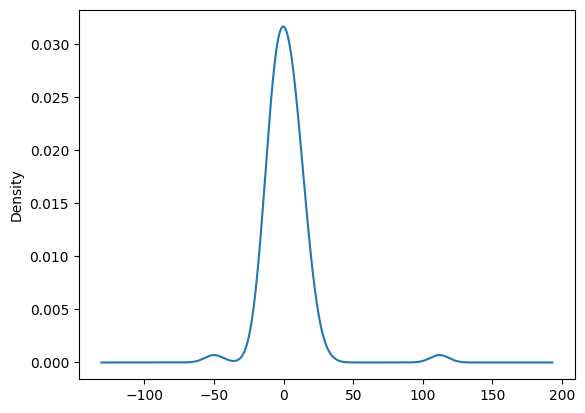

In [265]:
model_ARIMA_fit.resid.plot(kind='kde')

In [266]:
test_dataset['Predicted_ARIMA']=pred

/tmp/ipython-input-929166748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

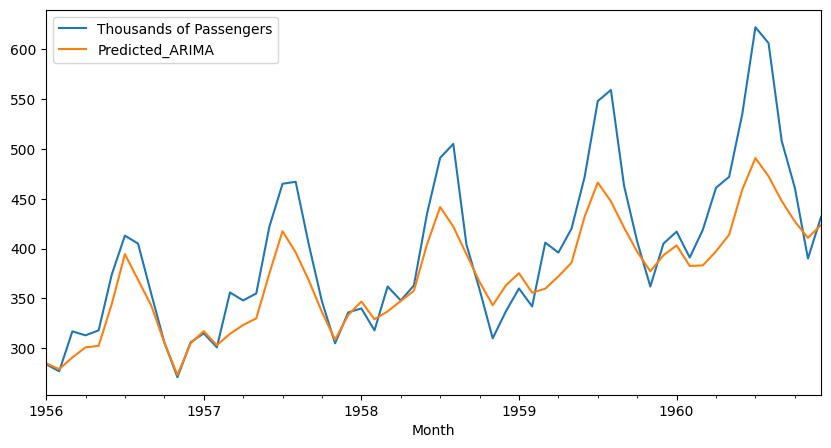

In [267]:
test_dataset[['Thousands of Passengers','Predicted_ARIMA']].plot(figsize=(10,5))

## Sarimax model

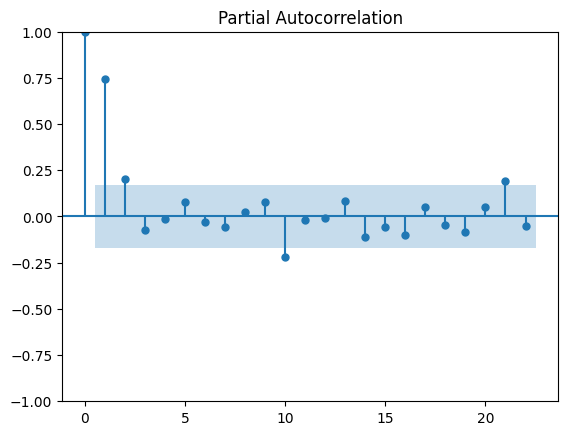

In [268]:
pacf12=plot_pacf(df_airline['Passengers 12 difference'].dropna())

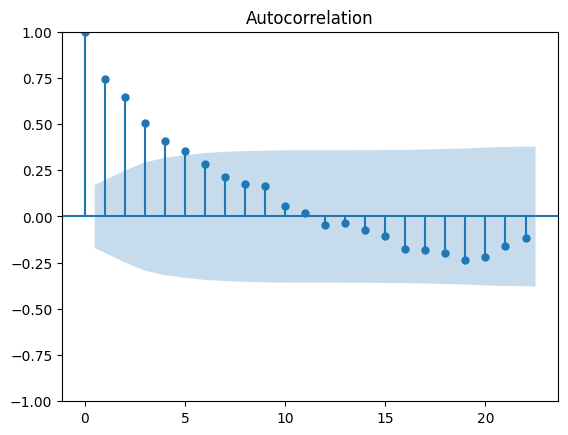

In [269]:
acf12=plot_acf(df_airline['Passengers 12 difference'].dropna())

In [270]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMAX=SARIMAX(train_dataset['Thousands of Passengers'],order=(2,0,5),seasonal_order=(0,1,0,12))
model_SARIMAX_fit=model_SARIMAX.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [278]:
SARIMAX_pred=model_SARIMAX_fit.predict(start=pred_start_date,end=pred_end_date)
test_dataset.loc[:, 'Predicted_SARIMA']=SARIMAX_pred

<Axes: ylabel='Density'>

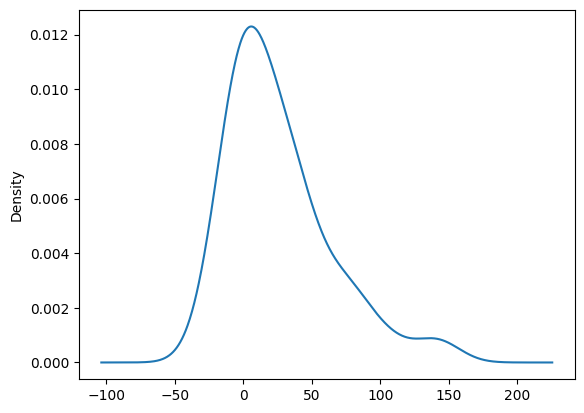

In [279]:
residuals_SARIMAX=test_dataset['Thousands of Passengers']-SARIMAX_pred

residuals_SARIMAX.plot(kind='kde')

<Axes: xlabel='Month'>

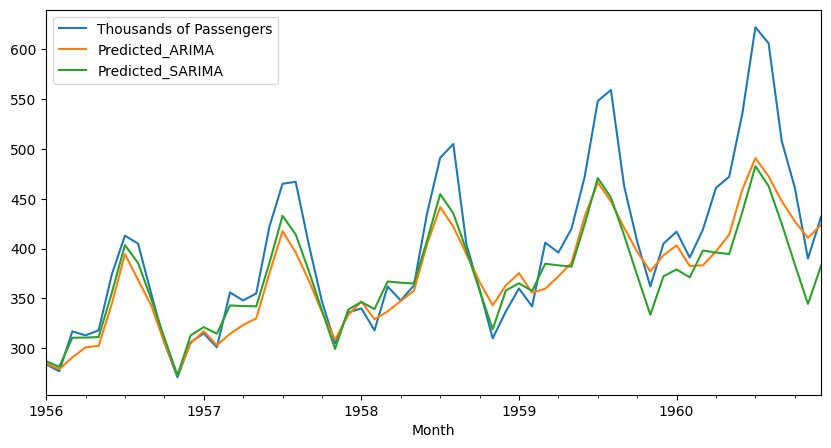

In [280]:
test_dataset[['Thousands of Passengers','Predicted_ARIMA','Predicted_SARIMA']].plot(figsize=(10,5))